In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx as nx

In [2]:
def create_rand_graph(size=20,p_edge=0.05):
    g = nx.Graph()
    for i in range(size):
        g.add_node(i)
        if i > 0:
            poss = set(range(i))
            add_new_edge = True
            while add_new_edge and len(poss)>0:
                new_edge = np.random.choice(list(poss))
                g.add_edge(i,new_edge)
                poss.remove(new_edge)
                add_new_edge = np.random.rand() < p_edge
    return g    

In [3]:
poss = set(range(5))
np.random.rand()

0.8207853778391235

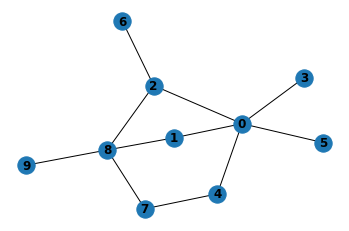

In [3]:
test_g = create_rand_graph(size=10,p_edge=0.10)

f,ax = plt.subplots(1,1)

nx.draw(test_g, with_labels=True, font_weight='bold')
plt.show()

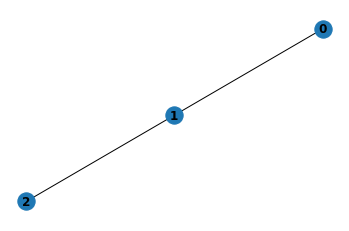

In [4]:
easy_g = create_rand_graph(size=3)
f,ax = plt.subplots()

nx.draw(easy_g, with_labels=True, font_weight='bold')
plt.show()

In [5]:
sc_mult = lambda a,x:(a*x[0],a*x[1])
dist = lambda p1,p2:((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**0.5
vec_add = lambda v1,v2: (v1[0]+v2[0],v1[1]+v2[1])


def force_simul(g,err=1e-6,max_iter=100,attr_k=None,repl_k=None,debug=False,max_spd = 2):
    if not attr_k:
        attr_k = 1/(g.number_of_nodes())
    if not repl_k:
        repl_k = 1/(g.number_of_nodes())
    pos = [tuple(2*np.random.ranf(2)-1) for n in range(g.number_of_nodes())]
    print("attr_k:",attr_k)
    print("repl_k:",repl_k)
    
    delta = 0
    for it in range(max_iter):
        forces = [(0,0)]*g.number_of_nodes()
        delta = 0
        # calc repl forces
        for i in range(g.number_of_nodes()):
            neighbors = set(g.adj[i])
            for j in range(i+1,g.number_of_nodes()):
                d = dist(pos[j],pos[i])
                f_mag = (-1*repl_k)/(d**2)
                v_i_j = (pos[j][0]-pos[i][0],pos[j][1]-pos[i][1])
                f_i_j = sc_mult(f_mag,v_i_j)
                f_j_i = sc_mult(-1,f_i_j)
                if abs(f_mag) >= err:
                    forces[i] = vec_add(forces[i],f_i_j)
                    #forces[i] = sc_mult(0.5,forces[i])
                    forces[j] = vec_add(forces[j],f_j_i)
        if debug:
            print("repl",forces)
        # calc attr forces
        #'''
        for u,v in g.edges:
            d = dist(pos[u],pos[v])
            v_i_j = (pos[u][0]-pos[v][0],pos[u][1]-pos[v][1])
            f_mag = attr_k*d#*(max_iter-it)/max_iter
            f_i_j = sc_mult(-1*f_mag,v_i_j)
            f_j_i = sc_mult(-1,f_i_j)
            if abs(f_mag) >= err:
                forces[u] = vec_add(forces[u],f_i_j)
                forces[v] = vec_add(forces[v],f_j_i)
                if debug:
                    print("attr bw {} -> {} = {}".format(u,v,f_i_j))
                    print("attr bw {} -> {} = {}".format(v,u,f_j_i))
        if debug:
            print("attr",forces)
        #'''
        forces[0]=(0,0)
        # apply forces
        for i in range(g.number_of_nodes()):
            if dist((0,0),forces[i])>err:
                f_mag = dist((0,0),forces[i])
                forces[i] = sc_mult(min(max_spd,f_mag)/f_mag,forces[i])
                new_pos = vec_add(pos[i],forces[i])
                if new_pos[0] != new_pos[0] or new_pos[1] != new_pos[1]:
                    print(pos[i],forces[i])
                    return pos
                delta += dist(new_pos,pos[i])/g.number_of_nodes()
                pos[i]=new_pos
        # check convergence based off of err
        if delta <= err:
            print("converged in {} iters".format(it))
            test_arr = np.array(pos)
            fig,ax = plt.subplots()
            ax.scatter(x=test_arr[:,0],y=test_arr[:,1])
            for i in range(len(test_arr)):
                ax.annotate(i,test_arr[i])

            plt.show()
            break
        if it%100 == 0 or debug:
            print("iteration num: {}".format(it))
            test_arr = np.array(pos)
            fig,ax = plt.subplots()
            ax.scatter(x=test_arr[:,0],y=test_arr[:,1])
            for i in range(len(test_arr)):
                ax.annotate(i,test_arr[i])

            plt.show()
    else:
        print("could not converge")
        print("err = {}".format(delta))
        print(forces)
    return pos 

attr_k: 0.2
repl_k: 0.2
iteration num: 0


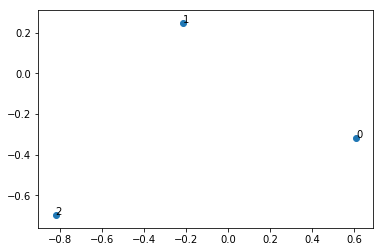

converged in 61 iters


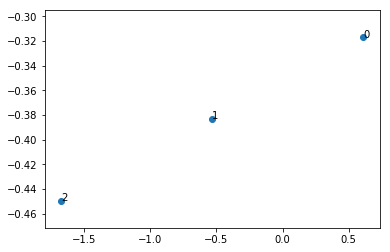

In [6]:
test_pos = force_simul(easy_g,max_iter=3000,debug=False,attr_k=0.2,repl_k=0.2,max_spd=0.2)

In [7]:
for u,v in easy_g.edges:
    print(u,v)

0 1
1 2


In [8]:
def plot_fdg(positions):
    test_arr = np.array(positions)
    fig,ax = plt.subplots()
    ax.scatter(x=test_arr[:,0],y=test_arr[:,1])
    for i in range(len(test_arr)):
        ax.annotate(i,test_arr[i])

    plt.show()

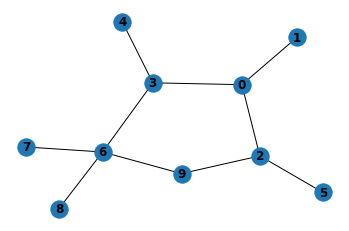

In [9]:
test_g = create_rand_graph(size=10,p_edge=0.10)

f,ax = plt.subplots(1,1)

nx.draw(test_g, with_labels=True, font_weight='bold')
plt.show()

attr_k: 0.1
repl_k: 0.1
iteration num: 0


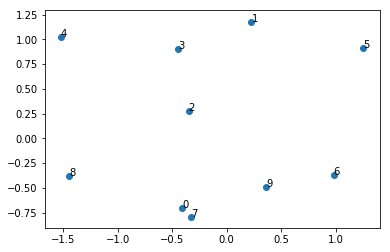

iteration num: 100


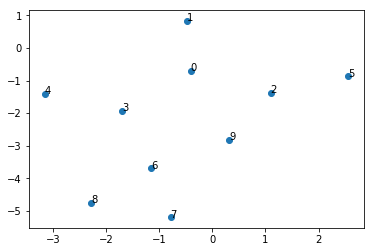

iteration num: 200


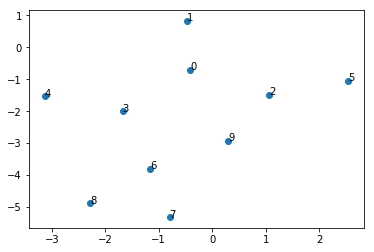

iteration num: 300


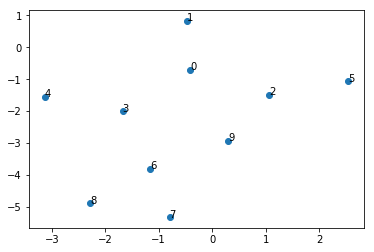

converged in 330 iters


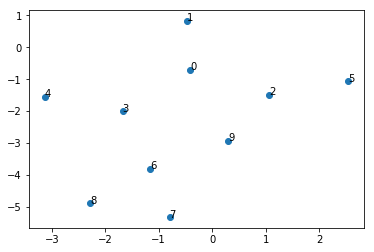

In [10]:
test_pos = force_simul(test_g,max_iter=3000,debug=False)

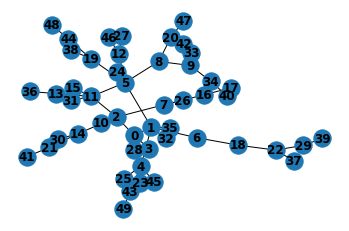

In [11]:
test_g = create_rand_graph(size=50,p_edge=0.10)

f,ax = plt.subplots(1,1)

nx.draw(test_g, with_labels=True, font_weight='bold')
plt.show()

attr_k: 0.025
repl_k: 0.03333333333333333
iteration num: 0


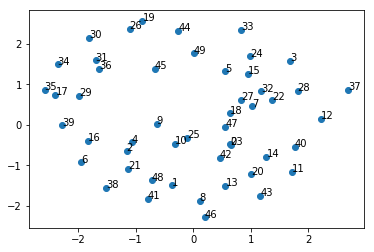

iteration num: 100


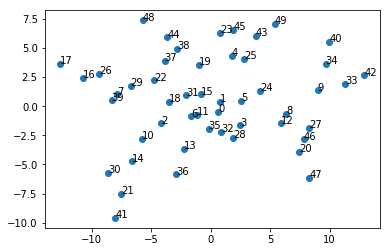

iteration num: 200


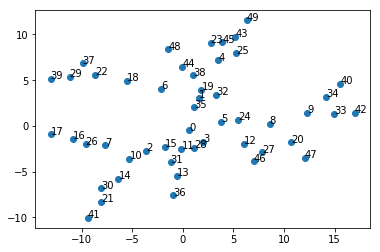

iteration num: 300


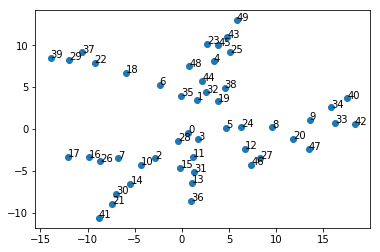

iteration num: 400


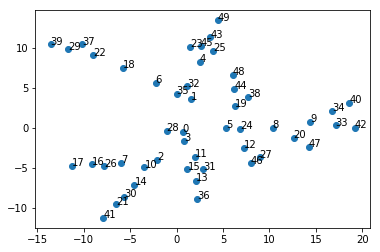

iteration num: 500


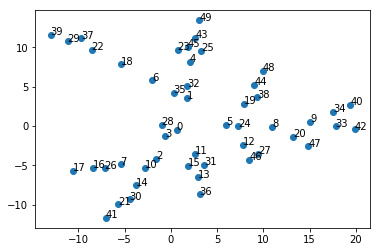

iteration num: 600


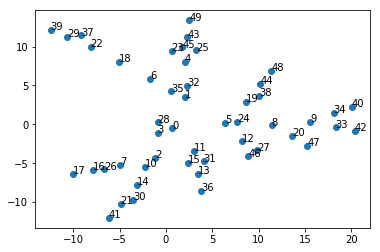

iteration num: 700


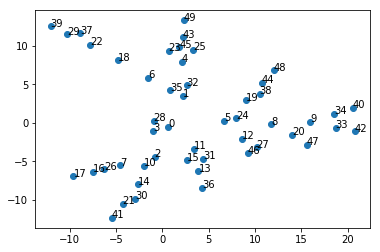

iteration num: 800


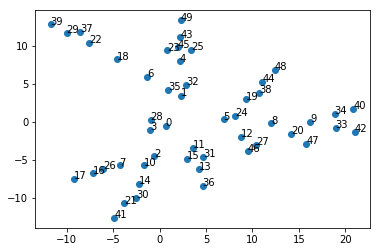

iteration num: 900


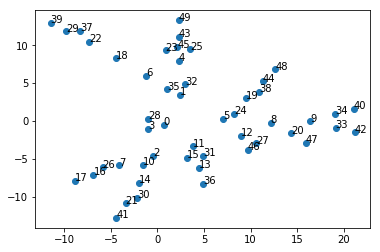

iteration num: 1000


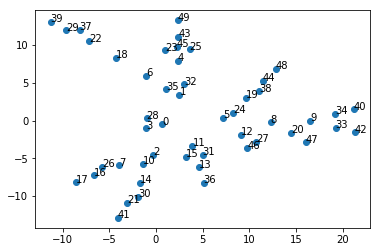

iteration num: 1100


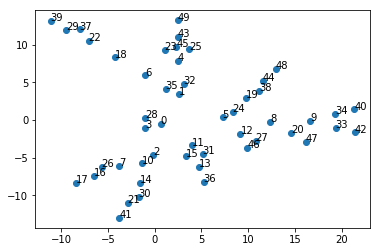

iteration num: 1200


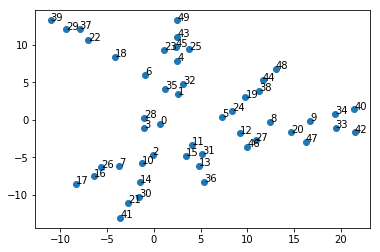

iteration num: 1300


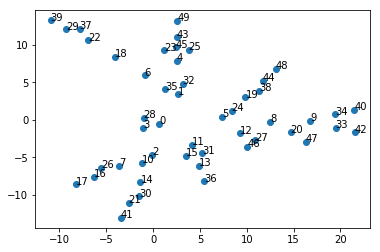

iteration num: 1400


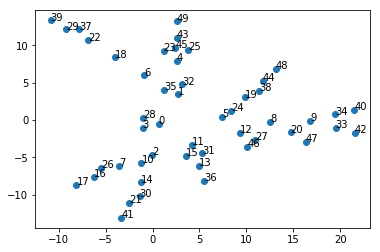

iteration num: 1500


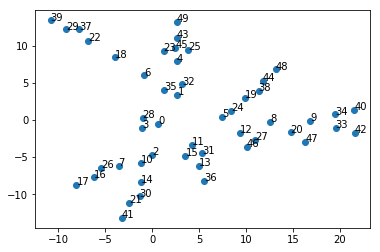

iteration num: 1600


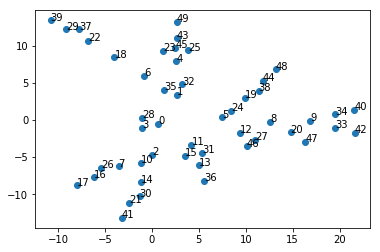

iteration num: 1700


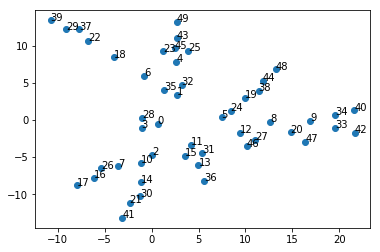

iteration num: 1800


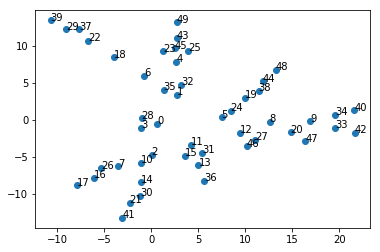

iteration num: 1900


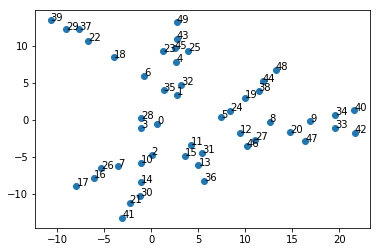

iteration num: 2000


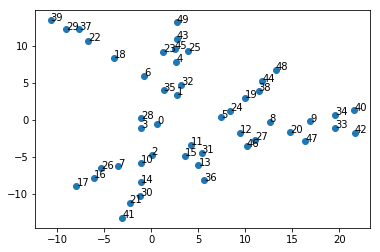

iteration num: 2100


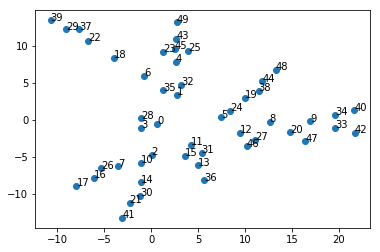

iteration num: 2200


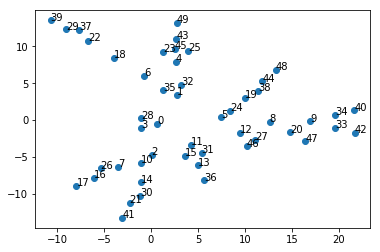

iteration num: 2300


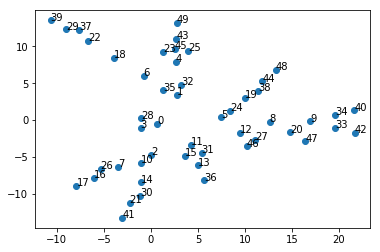

iteration num: 2400


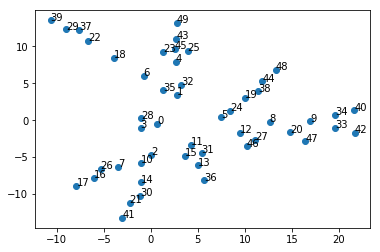

iteration num: 2500


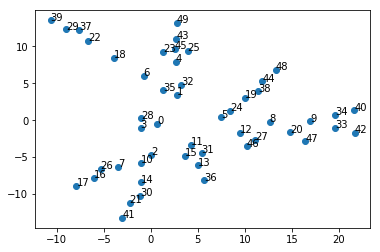

iteration num: 2600


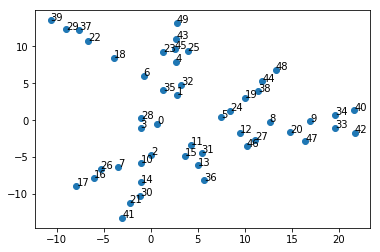

iteration num: 2700


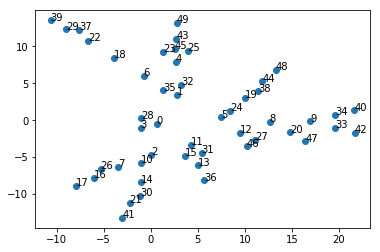

iteration num: 2800


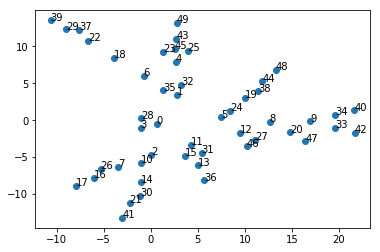

iteration num: 2900


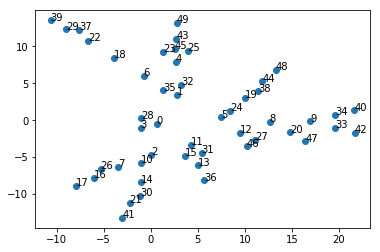

could not converge
err = 5.736653396799889e-06
[(0, 0), (2.7894106673365116e-06, 3.4276549287781677e-07), (3.417515207548849e-06, -3.628982745418341e-07), (-9.982874891734106e-07, -7.40730561610281e-08), (4.2227167270925126e-06, -1.1311158924776077e-07), (3.4164563648131363e-06, 1.2258260971564905e-06), (4.936328973415005e-06, 3.1196793277843415e-06), (4.229974355202115e-06, -2.124810047873446e-06), (3.855147324760555e-06, 2.9587650515194852e-06), (4.028281381934784e-06, 4.622348078908711e-06), (3.102385618215797e-06, 6.2538967428305e-08), (3.519735756928044e-06, 8.536949600845833e-07), (3.988328414104847e-06, 1.3863584342882485e-06), (4.370141918258463e-06, 1.2571258431043342e-06), (5.58071937619125e-06, -8.199949343423718e-07), (3.5962282804724577e-06, 9.519123020523823e-07), (5.211040123770383e-06, -3.5805519452425383e-06), (5.897847017391489e-06, -4.691786085087024e-06), (7.302222911953482e-06, 6.0984569648647735e-06), (3.214715312206684e-06, 1.2270363386329697e-06), (4.45755562111

In [12]:
test_pos = force_simul(test_g,max_iter=3000,attr_k=1/40,repl_k=1/30,debug=False)

In [13]:
#test_pos = force_simul(test_g,max_iter=3000,attr_k=1/22,repl_k=1/25,debug=False)

In [14]:
#test_pos = force_simul(g,max_iter=3000,attr_k=1/22,repl_k=1/25,debug=False)

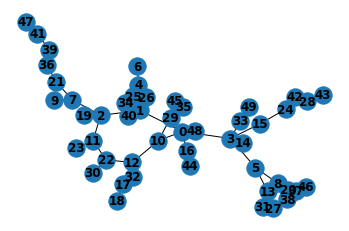

In [32]:
g = create_rand_graph(size = 50,p_edge=0.05)
f,ax = plt.subplots(1,1)

nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

In [34]:
# useful params for representing the graph
num_nodes = 0 #g.number_of_nodes()
rand_pos = lambda: num_nodes**0.5*(np.random.rand()-0.5)
node_pos = np.array([[rand_pos(),rand_pos()] for i in range(num_nodes)])
node_forces = np.array([[0.0,0.0] for i in range(num_nodes)])

# constants for TreeNode class
TN_CAP = 1
MIN_SL = 0.0001
DIRS = [(-1,1),(1,1),(-1,-1),(1,-1)]
TR_UP = 3
SPD_LIM = 2

# utility functions
sc_mult = lambda a,x:(a*x[0],a*x[1])
dist = lambda p1,p2:((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**0.5
vec_add = lambda v1,v2: (v1[0]+v2[0],v1[1]+v2[1])
mag = lambda v: dist((0.0,0.0),v)

'''
class Node():
    def __init__(self,i=None):
        self.i = i
'''        
# a node is represented as a single integer which maps to a pos & force        
class TN():
    def __init__(self,x,y,s,p=None):
        self.x = x
        self.y = y
        self.s = s
        self.parent = p
        # [Node] or [TN]
        # for [TN]:
        # 0|1
        # -+-
        # 2|3
        self.data = set()
        self.num_nodes = 0
        self.fx = 0.0
        self.fy = 0.0
        
    def is_leaf(self):
        if not self.data:
            return True
        return type(self.data) == set
    
    def get_node_adj_cent(self):
        node_adj_center = self.x,self.y
        if self.is_leaf() and len(self.data)>0:
            node_adj_center = tuple(np.mean([node_pos[n][i] for n in self.data]) for i in range(2))
        return node_adj_center
    
    def contains_helper(self,nx,ny):
        return not (nx < (self.x-self.s/2) or nx > (self.x+self.s/2) or ny > (self.y+self.s/2) or ny < (self.y-self.s/2))
    
    def contains(self,n):
        return self.contains_helper(*node_pos[n])
        
    
    def add(self,n):
        # if node does not fit in here, send it to parent & add in there
        if not self.contains(n):
            if self.parent:
                self.parent.add(n)
                return
            else:
                print("Root boundary needs to be bigger!")
                raise ValueError
        
        if self.is_leaf():
            if self.s > MIN_SL and self.num_nodes == TN_CAP: # splits TN if needed
                self.split()
                self.add(n)
                return
            else:
                self.data.add(n)
        else: # recursive search to add Node
            for child in self.data:
                if child.contains(n):
                    child.add(n)
                    break
        self.num_nodes+=1
    
    def split(self):
        nodes = [n for n in self.data]
        self.data = [TN(self.x+dx*self.s/4,self.y+dy*self.s/4,self.s/2,self) for dx,dy in DIRS]
        self.num_nodes = 0
        for n in nodes:
            self.add(n)
    
    def rm(self,n):
        if not self.contains(n):
            if self.parent:
                self.parent.rm(n)
                return
            else:
                print("Node exists outside QuadTree!")
                raise ValueError
        elif not self.is_leaf():
            for child in self.data:
                if child.contains(n):
                    child.rm(n)
                    break
        else:
            if n not in self.data:
                raise ValueError
            self.data.remove(n)
            cur = self # update new # of nodes in all parents
            while cur:
                cur.num_nodes-=1
                if cur.num_nodes == 0:
                    cur.data = set()
                cur = cur.parent
    
    def calc_repl_forces_within(self,repl_k):
        if self.is_leaf():
            for n1 in self.data:
                for n2 in self.data:
                    if n1 != n2:
                        # n2 --> n1
                        d = dist(node_pos[n1],node_pos[n2])
                        vec = vec_add(node_pos[n1],sc_mult(-1,node_pos[n2]))
                        vec = sc_mult(1/mag(vec),vec)
                        force = sc_mult(repl_k/(d**2),vec)
                        node_forces[n1] = vec_add(node_forces[n1],force)
            self.trickle_up(steps=TR_UP,repl_k=repl_k)
            #print(int(np.log2(100/self.s)))
            #self.trickle_up(steps=int(np.log2(100/self.s)),repl_k=repl_k)
        else:
            for child in self.data:
                child.calc_repl_forces_within(repl_k)
    
    def trickle_down(self):
        if self.is_leaf():
            for n in self.data:
                node_forces[n] = vec_add(node_forces[n],[self.fx,self.fy])
        else:
            for child in self.data:
                child.fx,child.fy = vec_add([child.fx,child.fy],[self.fx,self.fy])
                child.trickle_down()
        self.fx,self.fy = 0.0,0.0
    
    def apply_forces(self):
        nodes_to_readd = []
        if self.is_leaf():
            nodes = list(self.data)
            for n in nodes:
                new_pos = vec_add(node_forces[n],node_pos[n])
                node_forces[n] = [0.0,0.0]
                if not self.contains_helper(*new_pos):
                    self.rm(n)
                    nodes_to_readd.append(n)
                node_pos[n] = new_pos
        else:
            for child in self.data:
                nodes_to_readd+=child.apply_forces()
        
        if not self.parent:# root
            for n in nodes_to_readd:
                self.add(n)
        return nodes_to_readd
    
    def trickle_up(self,steps,repl_k):
        cur = self.parent
        nodes_applied_to = 0
        while cur and steps > 0:
            app_kids = 0
            #print(self.x,self.y)
            for child in cur.data:
                #print(child.x,child.y,child.s,child.contains_helper(self.x,self.y))
                if not child.contains_helper(self.x,self.y):
                    sx,sy = self.get_node_adj_cent()
                    cx,cy = child.get_node_adj_cent()
                    d = dist([sx,sy],[cx,cy])
                    vec = vec_add([cx,cy],sc_mult(-1,[sx,sy]))
                    vec = sc_mult(1/mag(vec),vec)
                    force = sc_mult(self.num_nodes*repl_k/(d**2),vec)
                    child.fx,child.fy = vec_add([child.fx,child.fy],force)
                    app_kids+=1
                    nodes_applied_to+=child.num_nodes
            if app_kids != 3:
                print("BIG PROBLEMO")
                print(app_kids,steps)
            cur = cur.parent
            steps-=1
            if nodes_applied_to == 0:
                steps+=1
                
            

def calc_attr_forces(g,attr_k):
    for n1,n2 in g.edges:
        d = dist(node_pos[n1],node_pos[n2])
        vec12 = vec_add(node_pos[n2],sc_mult(-1,node_pos[n1]))
        vec12 = sc_mult(1/mag(vec12),vec12)
        for12 = sc_mult(attr_k*d,vec12)
        for21 = sc_mult(-1,for12)
        node_forces[n1] = vec_add(node_forces[n1],for12)
        node_forces[n2] = vec_add(node_forces[n2],for21)
        
def speed_bump():
    for i in range(num_nodes):
        if mag(node_forces[i])>SPD_LIM:
            node_forces[i] = sc_mult(SPD_LIM/mag(node_forces[i]),node_forces[i])

In [19]:
def get_line_segs(r):
    tl = r.x-r.s/2,r.y+r.s/2
    tr = r.x+r.s/2,r.y+r.s/2
    bl = r.x-r.s/2,r.y-r.s/2
    br = r.x+r.s/2,r.y-r.s/2
    result = [(tl,tr),(bl,br),(tl,bl),(tr,br)]
    if not r.is_leaf():
        for child in r.data:
            result+=get_line_segs(child)
    return result

In [20]:
def QT_force_simul(g,err=1e-6,max_iter=100,attr_k=None,repl_k=None,debug=False):
    global num_nodes,node_pos,node_forces
    num_nodes = g.number_of_nodes()
    node_pos = np.array([[rand_pos(),rand_pos()] for i in range(num_nodes)])
    node_forces = np.array([[0.0,0.0] for i in range(num_nodes)])
    
    root = TN(0.0,0.0,2**8)#2**12)
    
    for i in range(num_nodes):
        root.add(i)
    
    for epoch in range(max_iter):
        # calc replusive forces
        root.calc_repl_forces_within(repl_k)
        root.trickle_down()
        # calc attr forces
        calc_attr_forces(g,attr_k)
        # anchor the 0th node
        node_forces[0] = [0.0,0.0]
        # calc force deltas
        deltas = np.mean(list(map(mag,node_forces)))
        # apply speed limit for node movement
        speed_bump()
        # apply forces
        reorg = len(root.apply_forces())
        if debug:
            print("reorganized {} nodes".format(reorg))
            print(node_pos)
            print("avg force magnitude: {}".format(deltas))
            
        if epoch%100 == 0 or debug:
            print("epoch num: {}".format(epoch))
            test_arr = np.array(node_pos)
            fig,ax = plt.subplots()
            ax.scatter(x=test_arr[:,0],y=test_arr[:,1])
            for i in range(len(test_arr)):
                ax.annotate(i,test_arr[i])
            l=max(map(abs,[*plt.xlim(),*plt.ylim()]))
            lines = []
            for p1,p2 in get_line_segs(root):
                x1,y1 = p1
                x2,y2 = p2
                lines.append((x1,x2))
                lines.append((y1,y2))
                lines.append('r')
                #print(lines[-3:])
            plt.plot(*lines)
            plt.xlim(-1*l,l)
            plt.ylim(-1*l,l)
            plt.show()
            print(root.num_nodes)
        if deltas <= err:
            print("converged in {} epochs".format(epoch))
            print("avg force magnitude: {}".format(deltas))
            break
    else:
        print("could not converge")
        print("avg force magnitude: {}".format(deltas))
    return node_pos

attr_k: 0.2
repl_k: 0.2
iteration num: 0


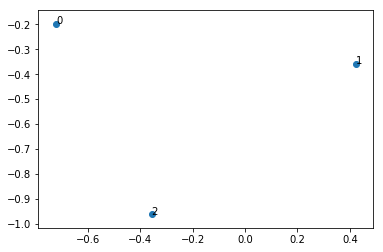

converged in 64 iters


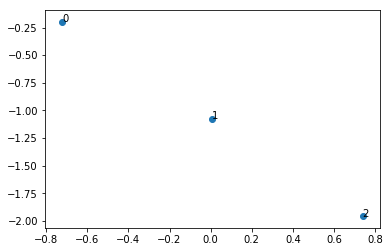

In [21]:
# without QT
test_pos = force_simul(easy_g,max_iter=1000,attr_k=0.2,repl_k=0.2,debug=False)

reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.66380212 -0.794302  ]
 [ 0.2084285   0.44122861]]
avg force magnitude: 0.2225325670684235
epoch num: 0


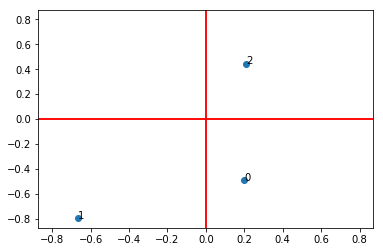

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.55891257 -0.67793853]
 [ 0.13430441  0.393219  ]]
avg force magnitude: 0.08165780168597403
epoch num: 1


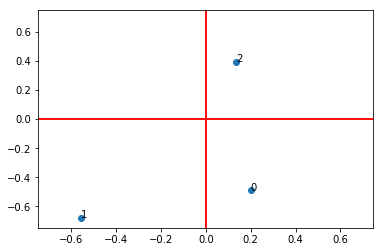

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.5096234  -0.59743707]
 [ 0.07690272  0.37548792]]
avg force magnitude: 0.05149004551654707
epoch num: 2


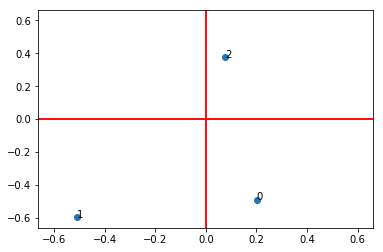

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49579085 -0.53708811]
 [ 0.0289963   0.37617318]]
avg force magnitude: 0.03660842170494812
epoch num: 3


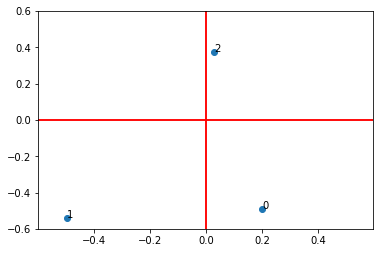

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.4985608  -0.48706829]
 [-0.01349509  0.38686918]]
avg force magnitude: 0.031304458469810385
epoch num: 4


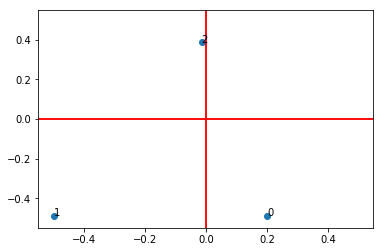

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50675341 -0.44331022]
 [-0.05227689  0.40289203]]
avg force magnitude: 0.028826600718366794
epoch num: 5


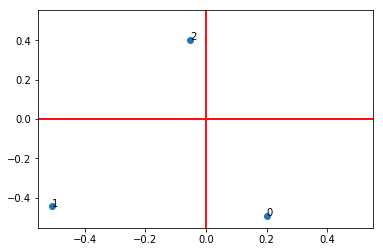

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51554334 -0.40455735]
 [-0.0879109   0.42191316]]
avg force magnitude: 0.02671004400269424
epoch num: 6


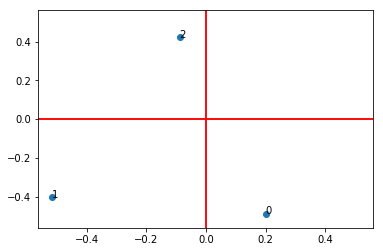

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.52320119 -0.3703528 ]
 [-0.1206343   0.44269187]]
avg force magnitude: 0.024604789346687916
epoch num: 7


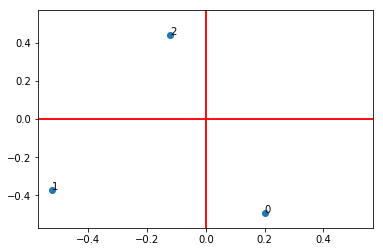

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.52923159 -0.34029764]
 [-0.15067812  0.46443631]]
avg force magnitude: 0.022580421455453314
epoch num: 8


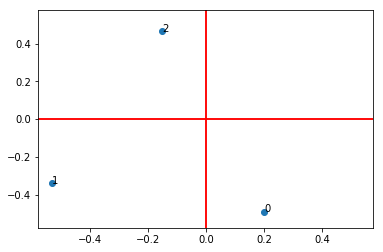

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.53360169 -0.31389391]
 [-0.17832907  0.48656017]]
avg force magnitude: 0.020725122094105573
epoch num: 9


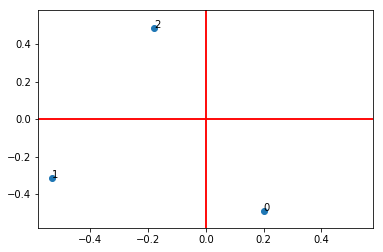

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.53644855 -0.29057994]
 [-0.20390206  0.50860919]]
avg force magnitude: 0.01908435073593891
epoch num: 10


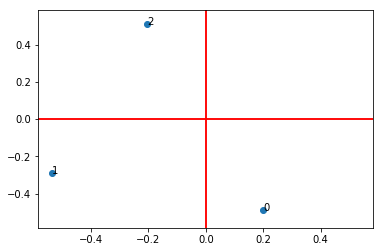

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.53796723 -0.26980078]
 [-0.22770057  0.53024269]]
avg force magnitude: 0.01766544180584834
epoch num: 11


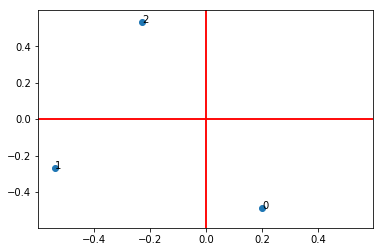

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.53836376 -0.25105989]
 [-0.2499912   0.55122319]]
avg force magnitude: 0.016452137963017793
epoch num: 12


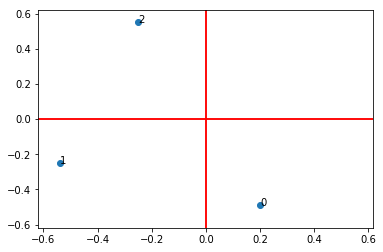

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.53783294 -0.23394266]
 [-0.27099474  0.57140127]]
avg force magnitude: 0.015417035520879372
epoch num: 13


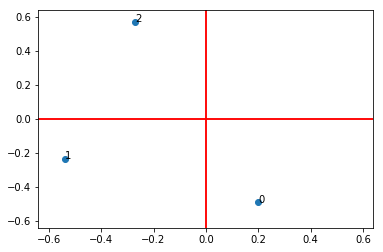

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.53654746 -0.21811861]
 [-0.29088815  0.59069653]]
avg force magnitude: 0.01452999505727239
epoch num: 14


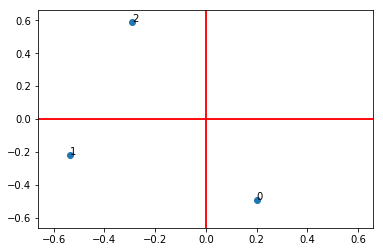

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.5346538  -0.20333206]
 [-0.30981136  0.60907858]]
avg force magnitude: 0.013762963473610704
epoch num: 15


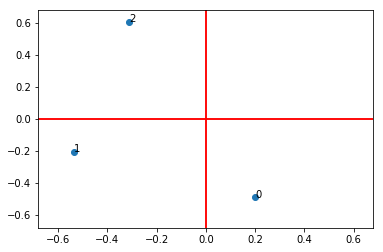

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.53227228 -0.18938862]
 [-0.32787503  0.62655059]]
avg force magnitude: 0.013092121576572283
epoch num: 16


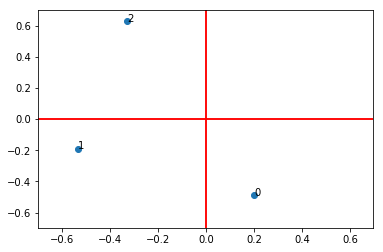

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.52949951 -0.17614162]
 [-0.34516743  0.64313661]]
avg force magnitude: 0.01249831709285032
epoch num: 17


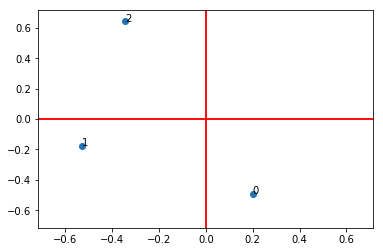

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.52641197 -0.1634805 ]
 [-0.36175996  0.65887251]]
avg force magnitude: 0.011966606155298397
epoch num: 18


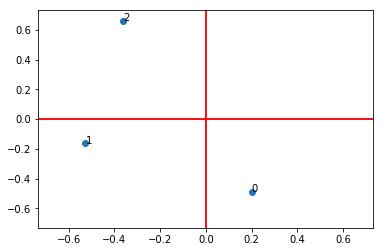

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.52306966 -0.15132152]
 [-0.37771125  0.67379977]]
avg force magnitude: 0.01148547390417124
epoch num: 19


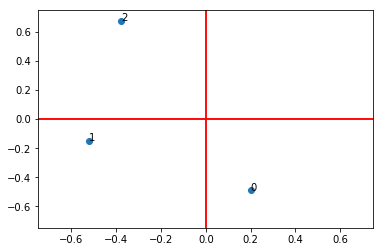

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.5195196  -0.13960066]
 [-0.39307013  0.68796161]]
avg force magnitude: 0.011046048525526493
epoch num: 20


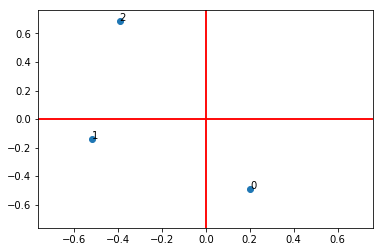

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51579873 -0.12826846]
 [-0.40787786  0.70140059]]
avg force magnitude: 0.01064143861780032
epoch num: 21


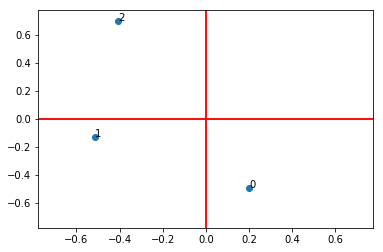

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51193631 -0.11728618]
 [-0.42216966  0.71415734]]
avg force magnitude: 0.010266221371058771
epoch num: 22


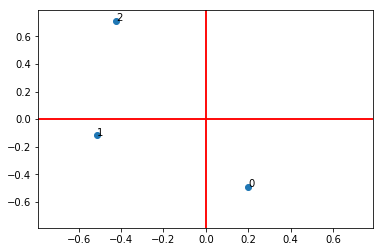

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50795581 -0.10662311]
 [-0.43597588  0.72626984]]
avg force magnitude: 0.00991606491029715
epoch num: 23


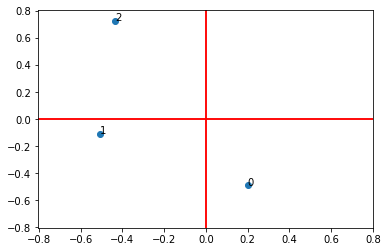

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50387633 -0.0962546 ]
 [-0.44932288  0.73777326]]
avg force magnitude: 0.009587455683378035
epoch num: 24


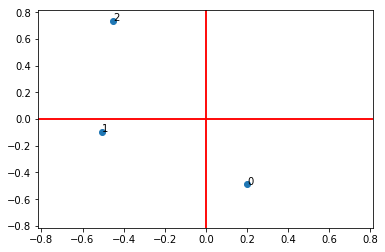

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49971369 -0.08616064]
 [-0.46223367  0.74869993]]
avg force magnitude: 0.00927750303026277
epoch num: 25


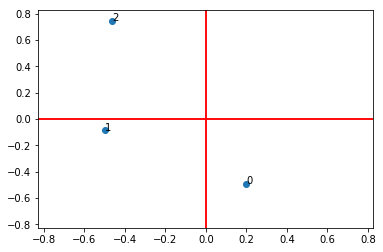

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49548124 -0.07632486]
 [-0.47472847  0.7590795 ]]
avg force magnitude: 0.008983798658909801
epoch num: 26


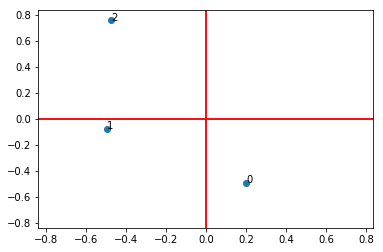

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49119051 -0.06673374]
 [-0.48682509  0.76893917]]
avg force magnitude: 0.008704314635949296
epoch num: 27


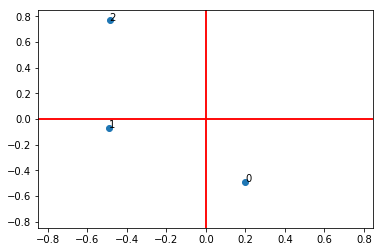

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.48685163 -0.0573761 ]
 [-0.49853932  0.77830388]]
avg force magnitude: 0.00843732833089497
epoch num: 28


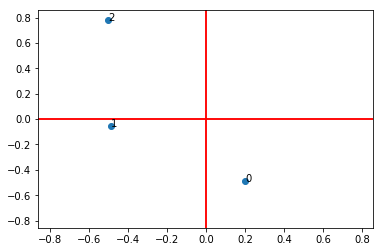

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.48247366 -0.04824263]
 [-0.50988518  0.78719661]]
avg force magnitude: 0.008181366327901538
epoch num: 29


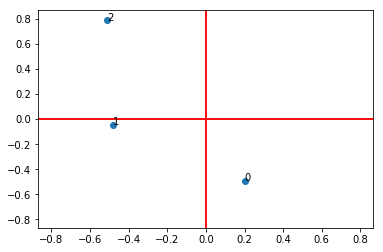

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47806487 -0.03932558]
 [-0.52087515  0.79563855]]
avg force magnitude: 0.007935161828881177
epoch num: 30


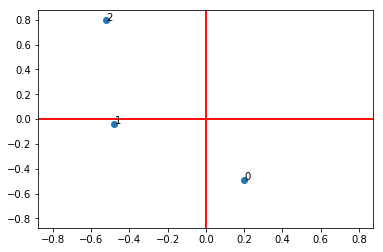

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47363292 -0.0306185 ]
 [-0.53152044  0.80364935]]
avg force magnitude: 0.007697621785170317
epoch num: 31


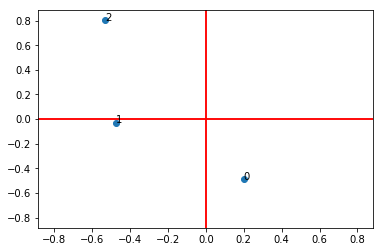

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.46918497 -0.02211602]
 [-0.54183111  0.8112473 ]]
avg force magnitude: 0.007467801149374602
epoch num: 32


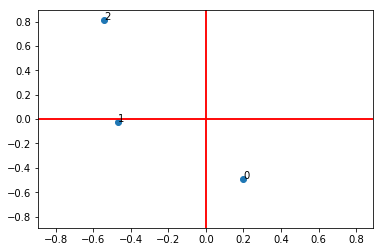

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.46472782 -0.0138137 ]
 [-0.55181623  0.81844949]]
avg force magnitude: 0.007244882414449324
epoch num: 33


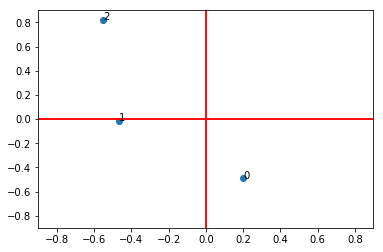

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.46026796 -0.00570788]
 [-0.56148407  0.825272  ]]
avg force magnitude: 0.0070281591301925095
epoch num: 34


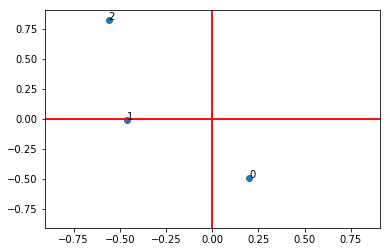

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.45581166  0.00220447]
 [-0.57084216  0.83172998]]
avg force magnitude: 0.006817022443837771
epoch num: 35


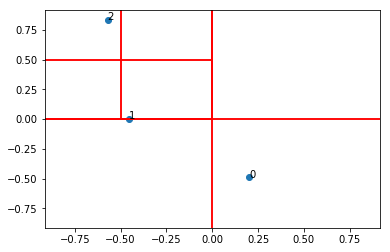

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.39189665 -0.03464758]
 [-0.5691357   0.81939762]]
avg force magnitude: 0.02874264043013353
epoch num: 36


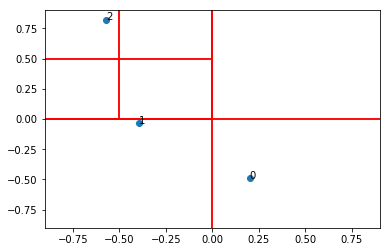

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.40808449 -0.00451283]
 [-0.55142038  0.73400173]]
avg force magnitude: 0.040473828869848766
epoch num: 37


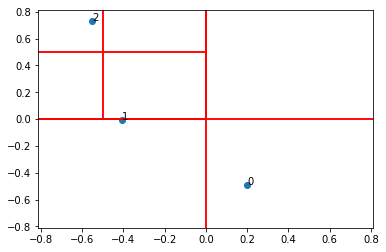

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.40926321 -0.01445767]
 [-0.53709538  0.66015891]]
avg force magnitude: 0.028411302952337347
epoch num: 38


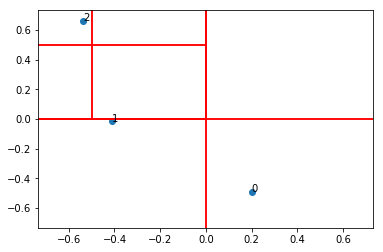

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.407308   -0.04729548]
 [-0.52432075  0.59270589]]
avg force magnitude: 0.03384933313950728
epoch num: 39


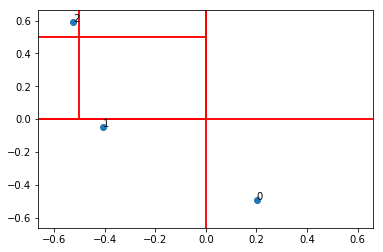

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.40851253 -0.0916672 ]
 [-0.51262806  0.52871439]]
avg force magnitude: 0.036479684111187995
epoch num: 40


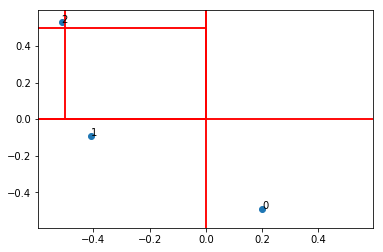

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.41617813 -0.14236608]
 [-0.50222509  0.46668486]]
avg force magnitude: 0.03805698119402655
epoch num: 41


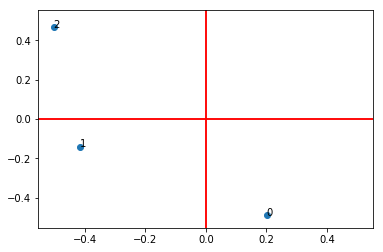

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.43159458 -0.19806478]
 [-0.53312599  0.56524069]]
avg force magnitude: 0.05369313596454156
epoch num: 42


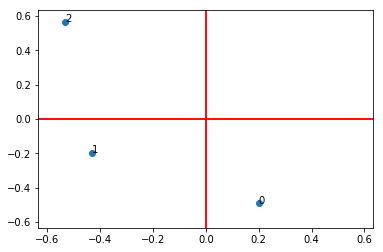

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.46110717 -0.19125961]
 [-0.55138009  0.59736066]]
avg force magnitude: 0.02241054547026394
epoch num: 43


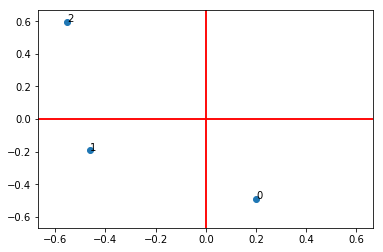

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.4814679  -0.18205458]
 [-0.56765753  0.620878  ]]
avg force magnitude: 0.01698196320240538
epoch num: 44


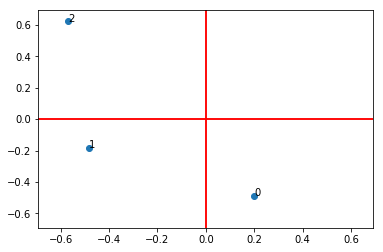

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49513418 -0.1720262 ]
 [-0.58281945  0.63937016]]
avg force magnitude: 0.013621410283787378
epoch num: 45


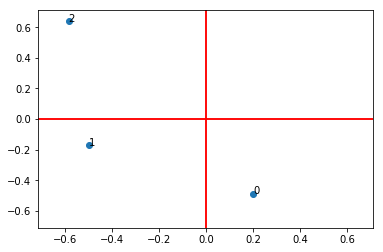

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50404394 -0.16177301]
 [-0.59720865  0.65461966]]
avg force magnitude: 0.011516687999938234
epoch num: 46


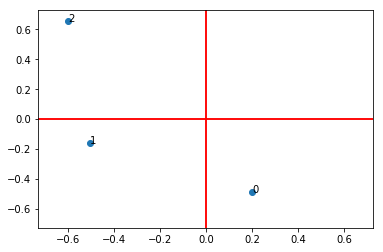

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50956989 -0.15156689]
 [-0.6109828   0.66763724]]
avg force magnitude: 0.010186083429490969
epoch num: 47


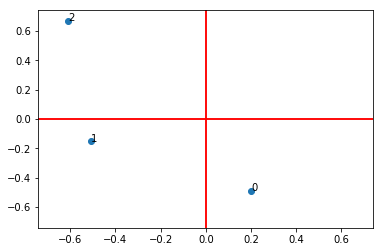

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51267262 -0.14152968]
 [-0.62422355  0.67903204]]
avg force magnitude: 0.009324874259239313
epoch num: 48


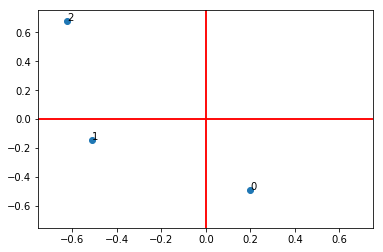

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51402688 -0.13171012]
 [-0.63697862  0.68918855]]
avg force magnitude: 0.008739104568429303
epoch num: 49


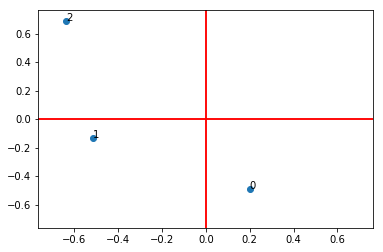

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51411006 -0.12212237]
 [-0.64927958  0.69836022]]
avg force magnitude: 0.00831064658806251
epoch num: 50


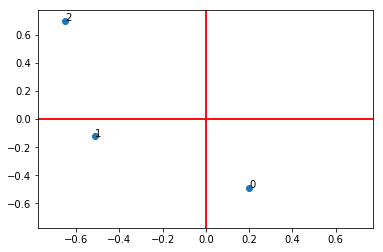

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51326268 -0.11276554]
 [-0.6611497   0.70672113]]
avg force magnitude: 0.007971410114554985
epoch num: 51


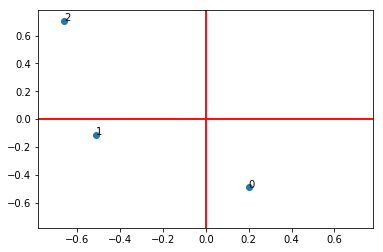

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.51172955 -0.10363321]
 [-0.6726076   0.71439561]]
avg force magnitude: 0.007683582371298406
epoch num: 52


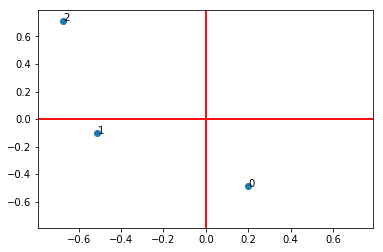

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50968825 -0.09471778]
 [-0.68366907  0.72147559]]
avg force magnitude: 0.007426459202979102
epoch num: 53


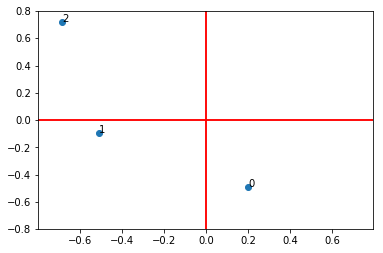

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50726871 -0.0860123 ]
 [-0.69434796  0.72803112]]
avg force magnitude: 0.007188657644938226
epoch num: 54


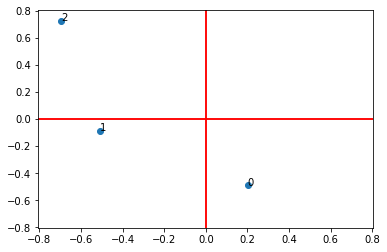

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50456693 -0.077511  ]
 [-0.70465668  0.73411704]]
avg force magnitude: 0.006963811903739413
epoch num: 55


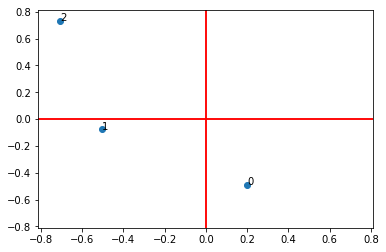

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.50165464 -0.06920934]
 [-0.71460647  0.73977729]]
avg force magnitude: 0.006748265402990457
epoch num: 56


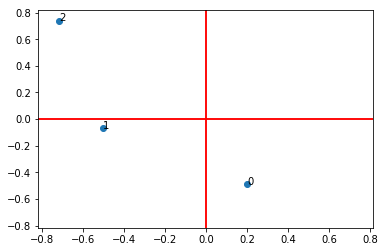

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49858603 -0.06110387]
 [-0.72420761  0.74504782]]
avg force magnitude: 0.006539843884870948
epoch num: 57


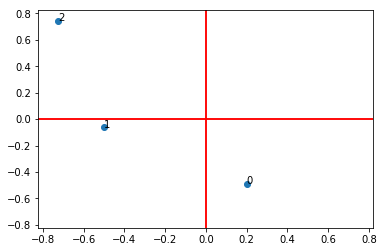

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49540259 -0.05319203]
 [-0.73346959  0.74995861]]
avg force magnitude: 0.006337201350951414
epoch num: 58


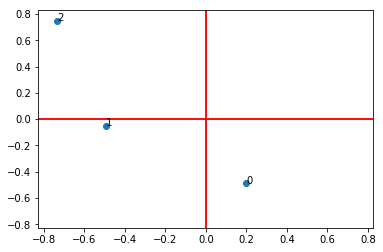

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.49213652 -0.04547194]
 [-0.74240121  0.75453515]]
avg force magnitude: 0.006139468206429813
epoch num: 59


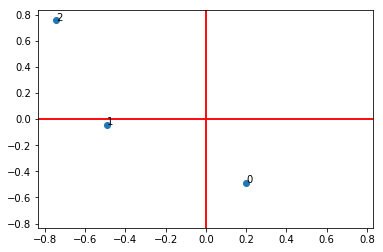

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.48881321 -0.03794223]
 [-0.75101069  0.75879948]]
avg force magnitude: 0.005946059481179824
epoch num: 60


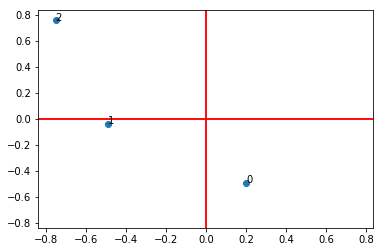

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.48545296 -0.03060192]
 [-0.7593058   0.76277095]]
avg force magnitude: 0.005756568520099242
epoch num: 61


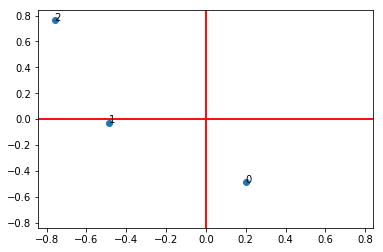

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.48207225 -0.02345028]
 [-0.76729391  0.76646686]]
avg force magnitude: 0.005570706744513286
epoch num: 62


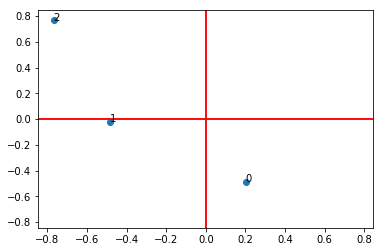

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47868471 -0.01648676]
 [-0.77498208  0.76990282]]
avg force magnitude: 0.005388268496106898
epoch num: 63


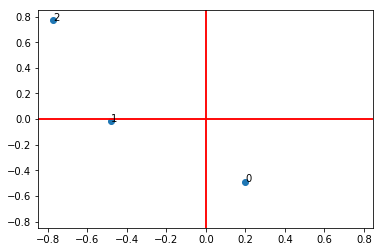

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47530172 -0.00971091]
 [-0.78237714  0.77309318]]
avg force magnitude: 0.0052091096727453325
epoch num: 64


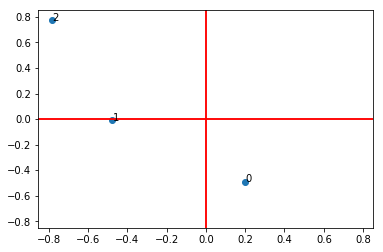

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47193297 -0.00312229]
 [-0.78948577  0.7760512 ]]
avg force magnitude: 0.005033134023582433
epoch num: 65


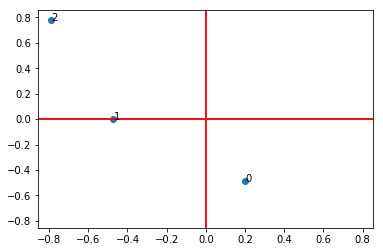

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.46858677  0.00327956]
 [-0.79631451  0.77878929]]
avg force magnitude: 0.0048602837432453186
epoch num: 66


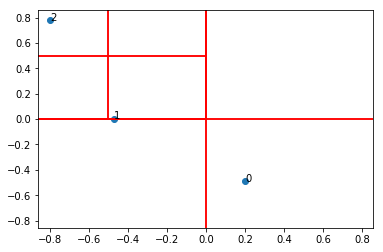

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.40699769 -0.0334416 ]
 [-0.7910046   0.76621854]]
avg force magnitude: 0.02845052150006031
epoch num: 67


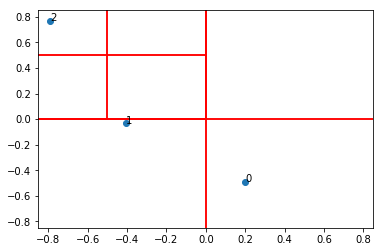

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.42640393 -0.0043603 ]
 [-0.7526125   0.68626116]]
avg force magnitude: 0.041219542326060676
epoch num: 68


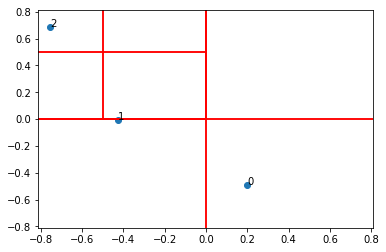

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.42262675 -0.01263595]
 [-0.72000023  0.61720765]]
avg force magnitude: 0.02848802669826545
epoch num: 69


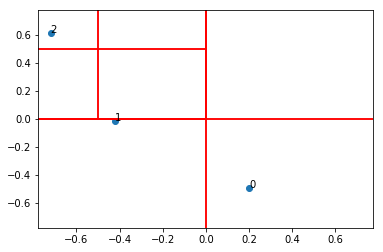

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.4105094  -0.04120572]
 [-0.69027147  0.55423193]]
avg force magnitude: 0.03355777163227251
epoch num: 70


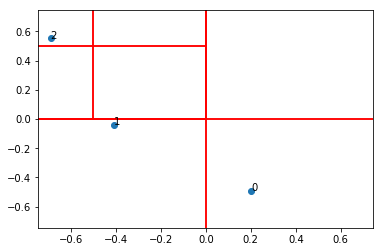

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.39841994 -0.07956893]
 [-0.66230385  0.4946968 ]]
avg force magnitude: 0.03533335282701814
epoch num: 71


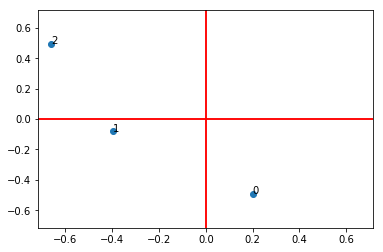

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.39093985 -0.1232892 ]
 [-0.70741774  0.57296307]]
avg force magnitude: 0.04489769564699603
epoch num: 72


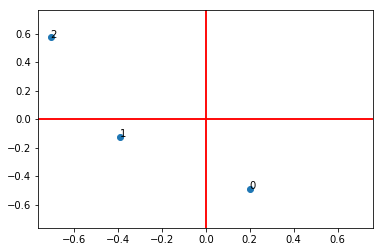

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.41587768 -0.11372447]
 [-0.72776703  0.60061597]]
avg force magnitude: 0.020347494183192576
epoch num: 73


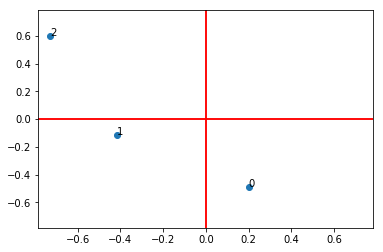

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.43438391 -0.10536048]
 [-0.74531487  0.62317032]]
avg force magnitude: 0.016295065596850147
epoch num: 74


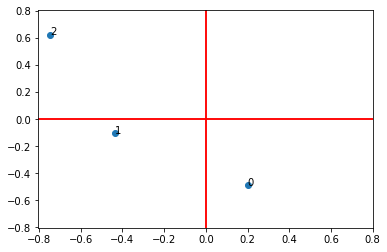

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.44836329 -0.09722358]
 [-0.76068237  0.64147192]]
avg force magnitude: 0.013357643580995534
epoch num: 75


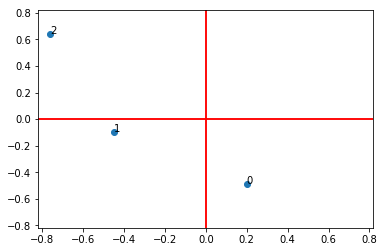

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.45883265 -0.08920004]
 [-0.77441515  0.65649281]]
avg force magnitude: 0.011180879575090645
epoch num: 76


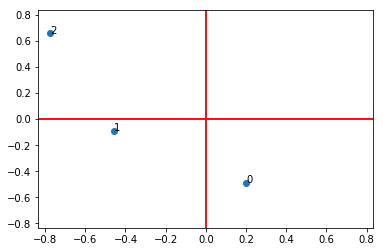

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.46654212 -0.08129288]
 [-0.78688554  0.66897431]]
avg force magnitude: 0.00956238295559689
epoch num: 77


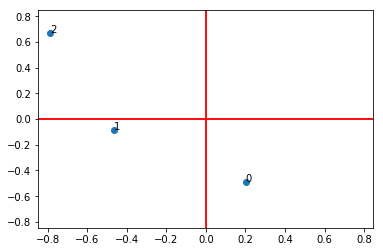

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47207608 -0.07352307]
 [-0.79834608  0.67946363]]
avg force magnitude: 0.008358399480842051
epoch num: 78


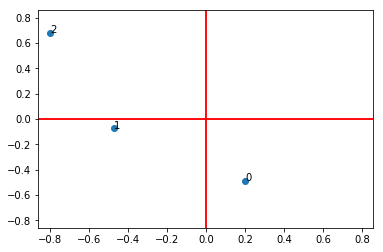

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47589413 -0.06591038]
 [-0.80897213  0.68836692]]
avg force magnitude: 0.0074598127788522315
epoch num: 79


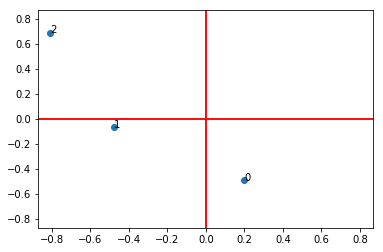

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47835835 -0.05846979]
 [-0.8188889   0.69598936]]
avg force magnitude: 0.00678192947884591
epoch num: 80


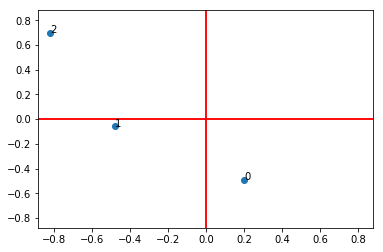

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.4797543  -0.05121168]
 [-0.82818844  0.70256344]]
avg force magnitude: 0.0062599061727691046
epoch num: 81


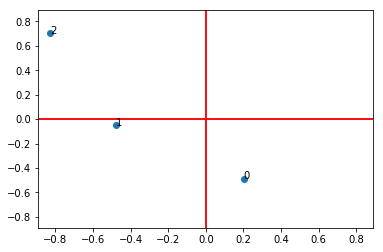

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.48030743 -0.04414283]
 [-0.83694036  0.70826867]]
avg force magnitude: 0.005845913342358299
epoch num: 82


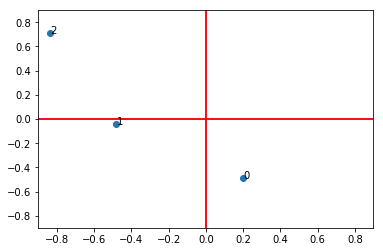

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.48019612 -0.03726745]
 [-0.84519873  0.71324555]]
avg force magnitude: 0.005506127024690281
epoch num: 83


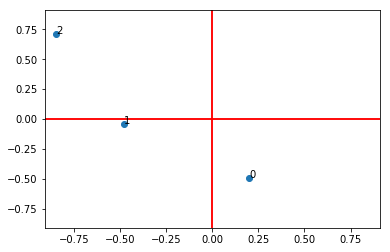

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47956185 -0.03058792]
 [-0.85300664  0.71760541]]
avg force magnitude: 0.005217424175684346
epoch num: 84


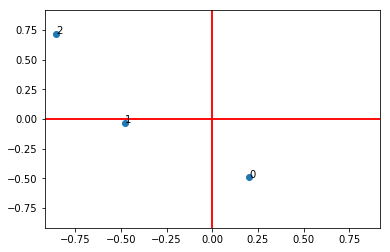

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47851717 -0.02410535]
 [-0.8603992   0.72143755]]
avg force magnitude: 0.004964329109082198
epoch num: 85


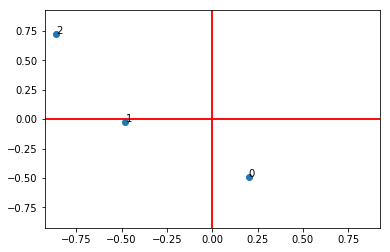

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.4771519  -0.01781996]
 [-0.86740569  0.72481443]]
avg force magnitude: 0.004736584865794377
epoch num: 86


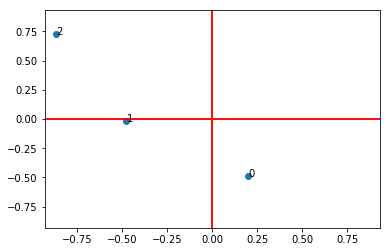

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47553803 -0.0117313 ]
 [-0.87405096  0.72779546]]
avg force magnitude: 0.0045274026743754225
epoch num: 87


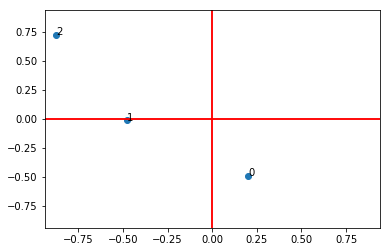

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.47373343 -0.0058384 ]
 [-0.88035654  0.73042992]]
avg force magnitude: 0.0043322712440942825
epoch num: 88


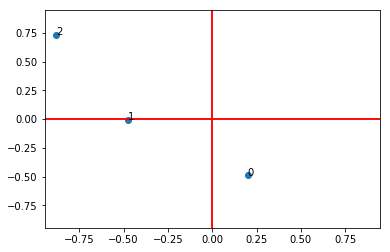

3
reorganized 0 nodes
[[ 2.00488288e-01 -4.89725156e-01]
 [-4.71784818e-01 -1.39892178e-04]
 [-8.86341346e-01  7.32759050e-01]]
avg force magnitude: 0.004148171430467148
epoch num: 89


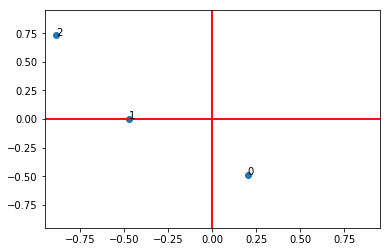

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.46973005  0.00536594]
 [-0.89202227  0.73481773]]
avg force magnitude: 0.003973065239093398
epoch num: 90


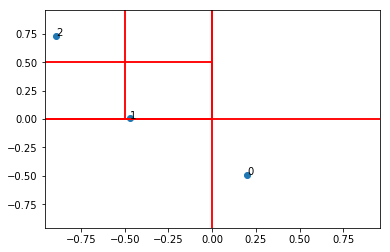

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.40968022 -0.03210308]
 [-0.88505879  0.7227862 ]]
avg force magnitude: 0.02822735946326212
epoch num: 91


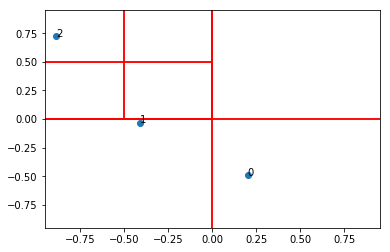

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.43148392 -0.00396915]
 [-0.83752952  0.6473059 ]]
avg force magnitude: 0.04159731232809885
epoch num: 92


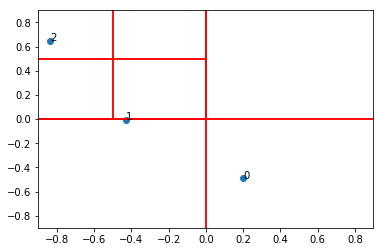

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.4263771  -0.01149022]
 [-0.79693355  0.58218704]]
avg force magnitude: 0.028609184076093582
epoch num: 93


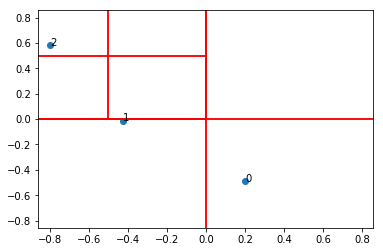

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.41063517 -0.03776675]
 [-0.75988649  0.52282795]]
avg force magnitude: 0.03353414235187146
epoch num: 94


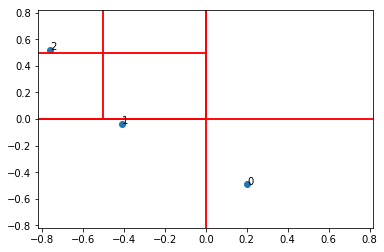

3
reorganized 1 nodes
[[ 0.20048829 -0.48972516]
 [-0.39342483 -0.07272353]
 [-0.72496995  0.46677711]]
avg force magnitude: 0.03500018107268472
epoch num: 95


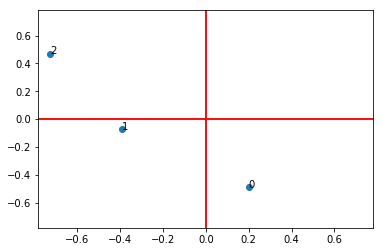

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.37960544 -0.11215198]
 [-0.77672937  0.53934913]]
avg force magnitude: 0.043639658050729196
epoch num: 96


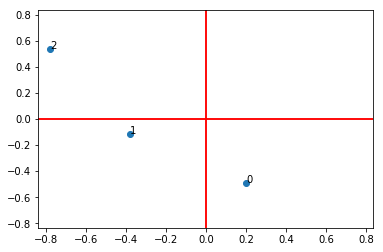

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.40407808 -0.10116163]
 [-0.7988152   0.56553853]]
avg force magnitude: 0.020362010010238865
epoch num: 97


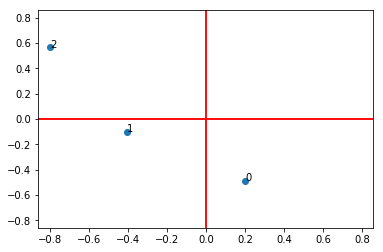

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.42209947 -0.09267671]
 [-0.81805269  0.58772737]]
avg force magnitude: 0.016428675306432553
epoch num: 98


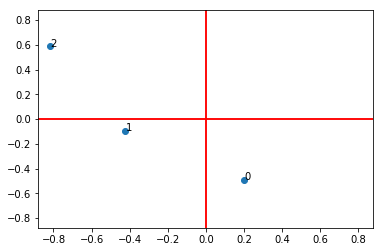

3
reorganized 0 nodes
[[ 0.20048829 -0.48972516]
 [-0.43617067 -0.084767  ]
 [-0.83466193  0.60594767]]
avg force magnitude: 0.013598828466076846
epoch num: 99


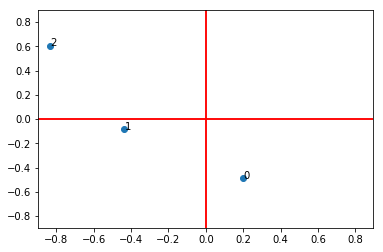

3
could not converge
avg force magnitude: 0.013598828466076846


In [41]:
# with QT optimization
test_pos = QT_force_simul(easy_g,max_iter=100,attr_k=0.1,repl_k=0.05,debug=True)

epoch num: 0


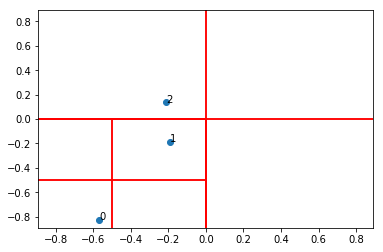

3
epoch num: 100


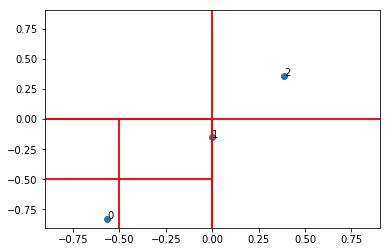

3
epoch num: 200


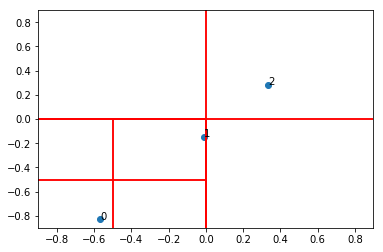

3
epoch num: 300


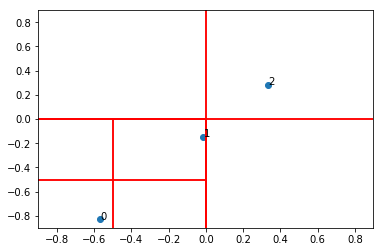

3
epoch num: 400


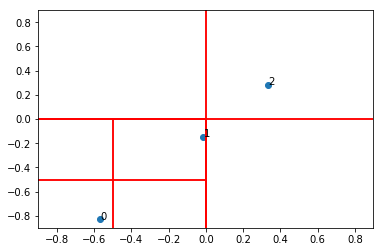

3
epoch num: 500


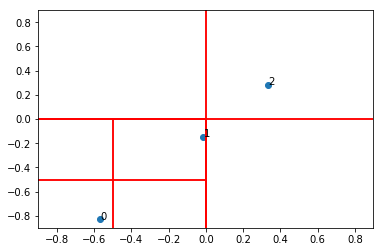

3
epoch num: 600


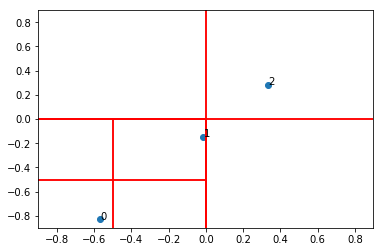

3
epoch num: 700


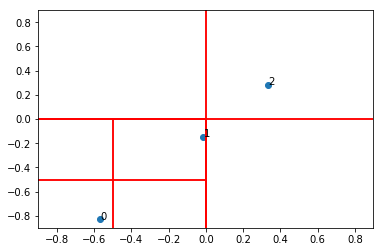

3
epoch num: 800


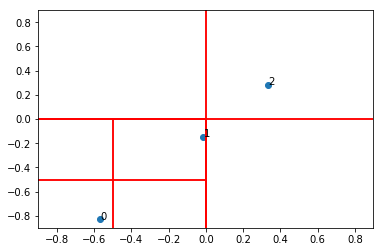

3
epoch num: 900


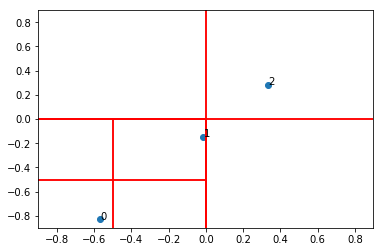

3
could not converge
avg force magnitude: 0.07100973162501881


In [42]:
# with QT optimization
test_pos = QT_force_simul(easy_g,max_iter=1000,attr_k=0.1,repl_k=0.05,debug=False)

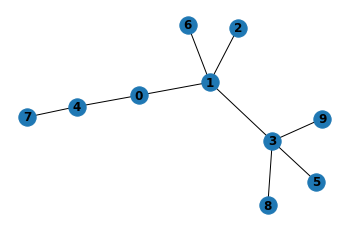

In [38]:
test_g = create_rand_graph(size=10,p_edge=0.10)

f,ax = plt.subplots(1,1)

nx.draw(test_g, with_labels=True, font_weight='bold')
plt.show()

attr_k: 0.05
repl_k: 0.1
iteration num: 0


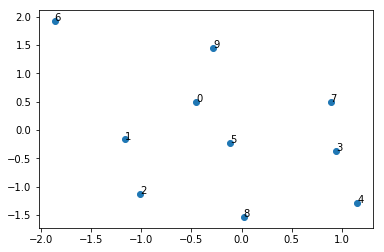

iteration num: 100


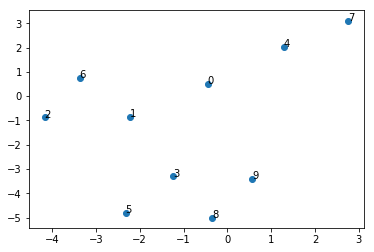

iteration num: 200


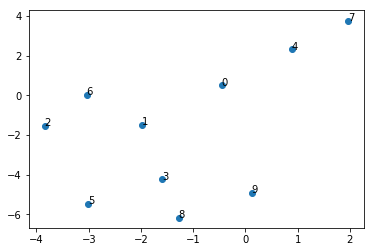

iteration num: 300


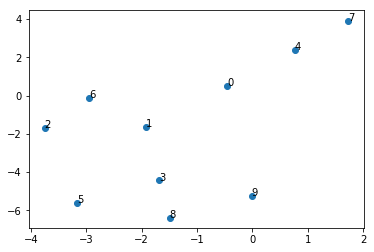

iteration num: 400


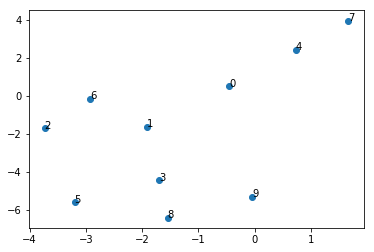

iteration num: 500


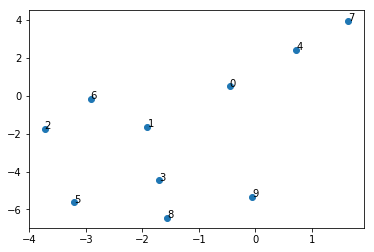

iteration num: 600


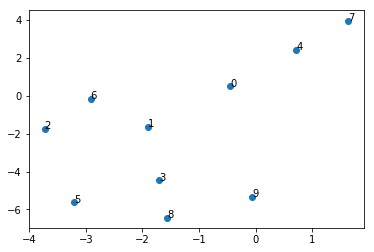

iteration num: 700


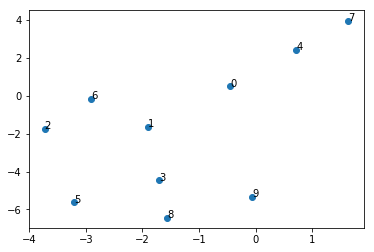

converged in 744 iters


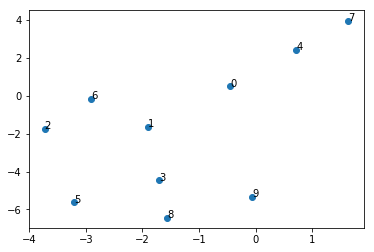

In [39]:
# without QT optimization
test_pos = force_simul(test_g,max_iter=3000,attr_k=0.05,repl_k=0.1,debug=False)

epoch num: 0


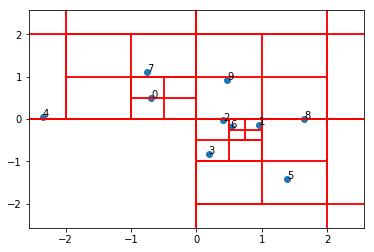

10
epoch num: 100


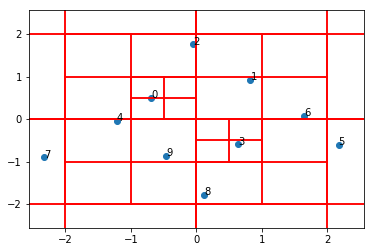

10
epoch num: 200


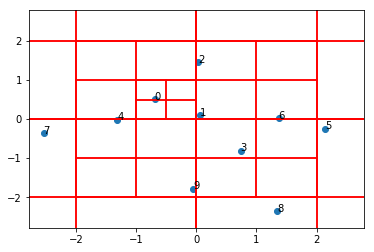

10
epoch num: 300


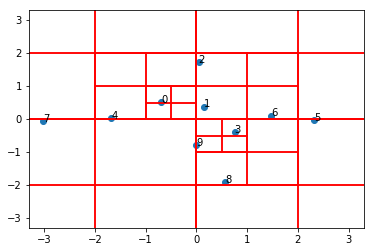

10
epoch num: 400


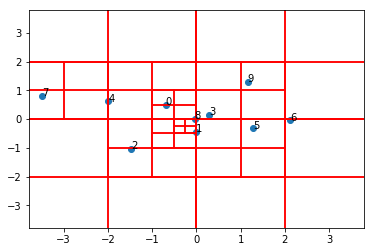

10
epoch num: 500


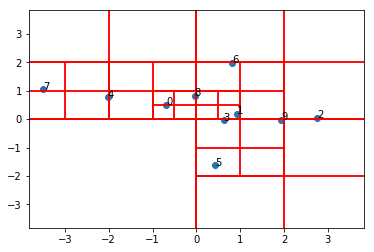

10
epoch num: 600


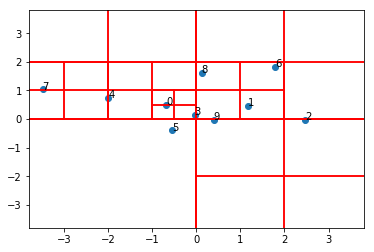

10
epoch num: 700


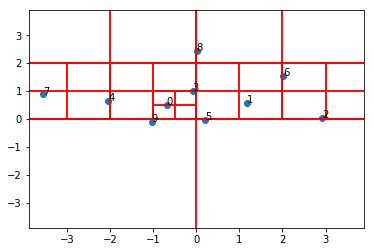

10
epoch num: 800


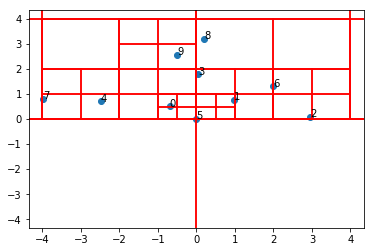

10
epoch num: 900


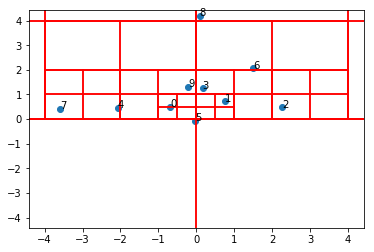

10
epoch num: 1000


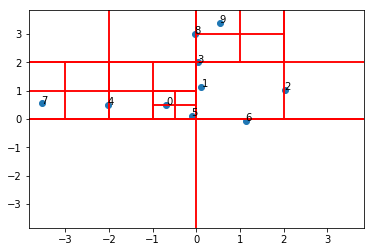

10
epoch num: 1100


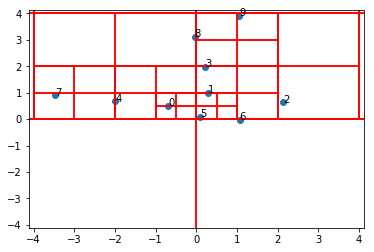

10
epoch num: 1200


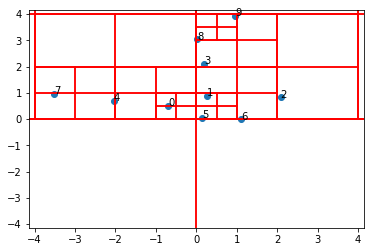

10
epoch num: 1300


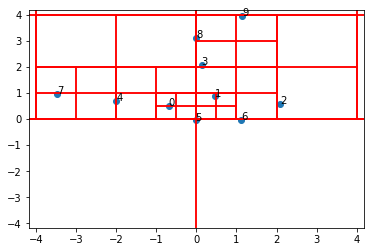

10
epoch num: 1400


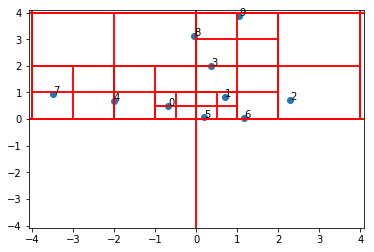

10
epoch num: 1500


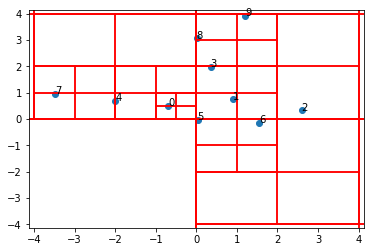

10
epoch num: 1600


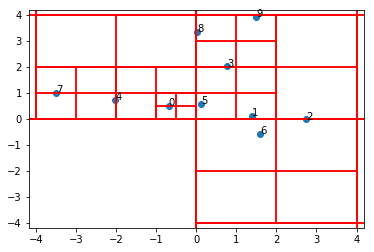

10
epoch num: 1700


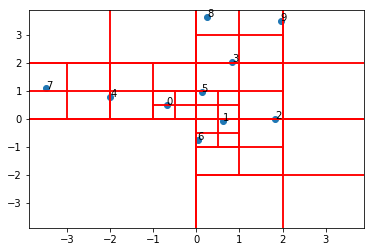

10
epoch num: 1800


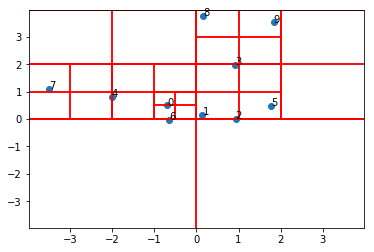

10
epoch num: 1900


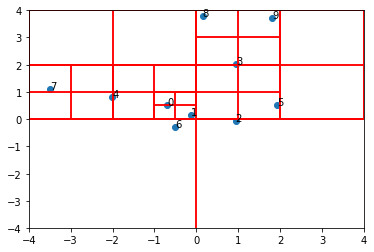

10
epoch num: 2000


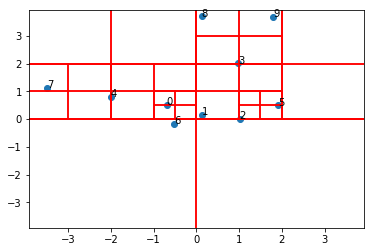

10
epoch num: 2100


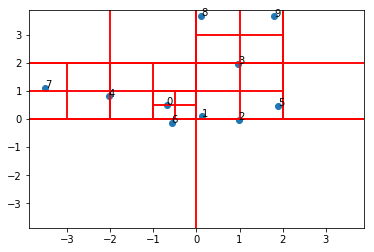

10
epoch num: 2200


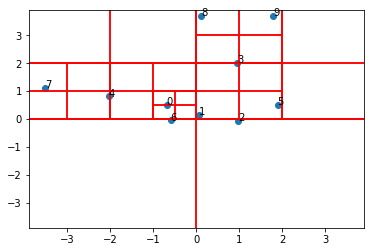

10
epoch num: 2300


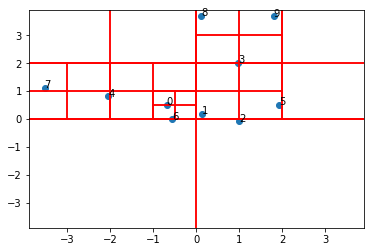

10
epoch num: 2400


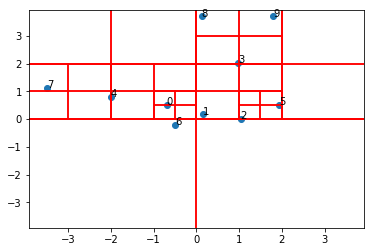

10
epoch num: 2500


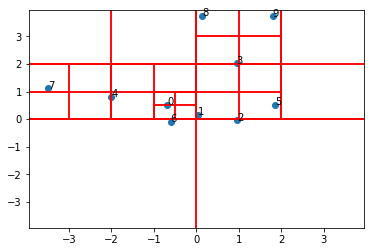

10
epoch num: 2600


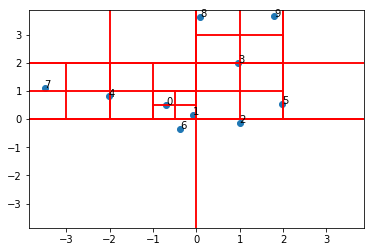

10
epoch num: 2700


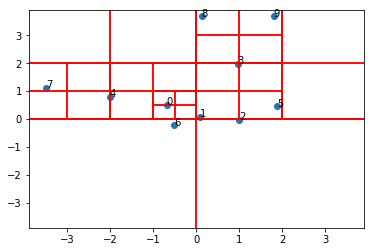

10
epoch num: 2800


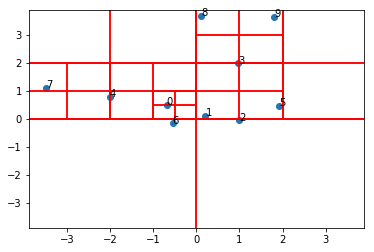

10
epoch num: 2900


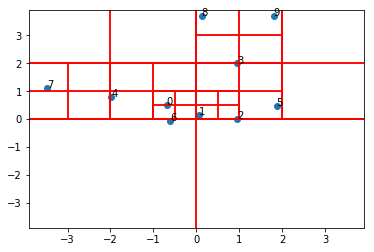

10
could not converge
avg force magnitude: 0.023310206613382192


In [40]:
# with QT optimization
test_pos = QT_force_simul(test_g,max_iter=3000,attr_k=0.05,repl_k=0.1,debug=False)

In [174]:
np.mean(list(map(mag,node_forces)))
node_pos

array([[ 1.23457995e+00, -1.00552672e+00],
       [-3.00173759e+02, -1.98770101e+03],
       [ 6.86058461e+01,  4.05525242e+02],
       [ 4.09832954e+02,  2.94912395e+03],
       [-1.71323064e+00, -1.38107395e+01],
       [-7.37496974e+01, -5.61726468e+02],
       [-7.16219951e+01, -5.53046695e+02],
       [-6.86278475e+01, -5.27172980e+02],
       [ 2.25466526e+00,  1.22761263e+01],
       [ 2.05184133e-02, -2.94533098e+00]])

In [51]:
get_line_segs(root)

NameError: name 'root' is not defined